# REPORTE DE CALIDAD PROYECTO INDIVIDUAL

### Primeros pasos: Importando librerías y creación de funciones para el análisis:

In [42]:
#SE IMPORTAN LAS LIBRERÍAS QUE SERÁN USADAS A LOS LARGO DEL REPORTE:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Función para detectar outliers:

In [21]:
def detectar_outliers(df:pd.DataFrame,columna:str,tecnica='cajas') -> pd.DataFrame:

    #Detección por medio de Diagrama de Cajas:
    if tecnica == 'cajas':
        q1 = df[columna].describe().loc['25%']
        q3 = df[columna].describe().loc['75%']
        rango_IC = q3 - q1
        minimo = q1 - ((1.5) * (rango_IC))
        maximo = q3 + ((1.5) * (rango_IC))


    #Detección de outliers por medio de las 3 sigmas:
    elif tecnica == 'sigmas':
        promedio = df[columna].mean()
        stddev = df[columna].std()
        maximo = promedio + (3 * stddev)
        minimo = promedio - (3 * stddev)


    df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0
    
    return df

##### Función para determinar y graficar la calidad de los datos:

In [113]:
def determinar_calidad(df:pd.DataFrame,columna:str): 
    #Outliers:
    df_outlier = df.copy()
    df_outlier['outlier'] = 1
    df_outlier = detectar_outliers(df_outlier,columna)

    #Datos generales:
    total = df.shape[0]
    no_nulos = df[columna].notnull().sum()
    nulos = total - no_nulos
    outliers = df_outlier[columna][df_outlier.outlier == 0].count()
    sin_errores = (total - nulos) - outliers 

    #Porcentaje de datos:
    porcentaje_nulos = round((nulos * 100)/total,2)
    porcentaje_outliers = round((outliers * 100)/total,2)
    porcentaje_sin_errores = round((sin_errores * 100)/total,2)

    #Datos para el grafico:
    titulo = f"Calidad_{columna}"
    estados = ['Outliers','Sin Errores','Valores Nulos'] 
    porcentajes = [porcentaje_outliers,porcentaje_sin_errores,porcentaje_nulos] 
    df = pd.DataFrame({"Estado":estados, 
                       "Porcentaje":porcentajes}) 

    #Grafico:
    plot = sns.barplot(x='Estado', y="Porcentaje", data=df)
    plot.set_title(titulo)
    

    for p in plot.patches:
        h, w, x = p.get_height(), p.get_width(), p.get_x()
        xy = (p.get_x() + p.get_width() / 2, p.get_height())
        plot.annotate(text=f"{h}%", xy=xy, ha='center', va='baseline',
                      fontsize = 11,color = 'black', xytext = (0,1),
                      textcoords = 'offset pixels')
    

    plt.show()

    

##### Función para determinar el porcentaje de valores nulos de una columna:

In [123]:
def porcentaje_de_valores_nulos(df:pd.DataFrame,columna:str) -> str:
    total =df.shape[0]
    no_nulos = df[columna].notnull().sum()
    nulos = total - no_nulos
    porcentaje_nulos = round((nulos * 100)/total,2)

    texto = f"Porcentaje de valores nulos para la columna '{columna}': {porcentaje_nulos}%"
    return texto

# **Tabla:** Venta
### Diccionario
| | Columna Original | Columna Normalizada | Tipo de Dato Original | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdVenta | IdVenta | int64 | Clave única que identifica la venta |
| 1 | Fecha | Fecha | Object | Fecha de la venta realizada |
| 2 | Fecha_Entrega | Fecha_Entrega | Object | Fecha de entrega de la venta |
| 3 | IdCanal | IdCanal | int64 | Clave única que identifica el canal de venta |
| 4 | IdCliente | IdCliente | int64 | Clave única que identifica al cliente |
| 5 | IdSucursal | IdSucursal | int64 | Clave única que identifica a la sucursal |
| 6 | IdEmpleado | IdEmpleado | int64 | Clave única que identifica al empleado |
| 7 | IdProducto | IdProducto | int64 | Clave única que identifica el producto de la venta|
| 8 | Precio | Precio | float64 | Precio unitario del producto vendido |
| 9 | Cantidad | Cantidad | float64 | Cantidad de producto de la venta realizada |

In [127]:
df_ventas = pd.read_csv('Datasets/Venta.csv')
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46180 entries, 0 to 46179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46180 non-null  int64  
 1   Fecha          46180 non-null  object 
 2   Fecha_Entrega  46180 non-null  object 
 3   IdCanal        46180 non-null  int64  
 4   IdCliente      46180 non-null  int64  
 5   IdSucursal     46180 non-null  int64  
 6   IdEmpleado     46180 non-null  int64  
 7   IdProducto     46180 non-null  int64  
 8   Precio         45260 non-null  float64
 9   Cantidad       45296 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.5+ MB


#### Integridad de los datos:

In [124]:
for columna in df_ventas.columns:
    print(porcentaje_de_valores_nulos(df_ventas,columna))

Porcentaje de valores nulos para la columna 'IdVenta': 0.0%
Porcentaje de valores nulos para la columna 'Fecha': 0.0%
Porcentaje de valores nulos para la columna 'Fecha_Entrega': 0.0%
Porcentaje de valores nulos para la columna 'IdCanal': 0.0%
Porcentaje de valores nulos para la columna 'IdCliente': 0.0%
Porcentaje de valores nulos para la columna 'IdSucursal': 0.0%
Porcentaje de valores nulos para la columna 'IdEmpleado': 0.0%
Porcentaje de valores nulos para la columna 'IdProducto': 0.0%
Porcentaje de valores nulos para la columna 'Precio': 1.99%
Porcentaje de valores nulos para la columna 'Cantidad': 1.91%


#### Calidad de los datos de la columna 'Precio':

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_1512\1251029243.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0


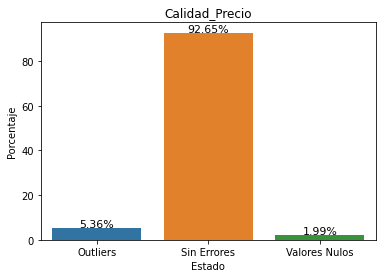

In [114]:
determinar_calidad(df_ventas,'Precio')

#### Calidad de los datos de la columna 'Cantidad':

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_1512\1251029243.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0


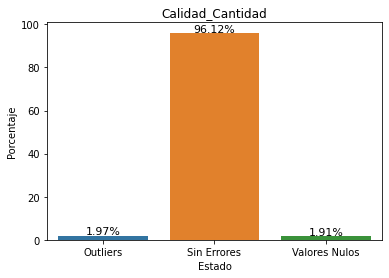

In [115]:
determinar_calidad(df_ventas,'Cantidad')

## **Tabla:** Compra
| | Columna Original | Columna Normalizada | Tipo de Dato Original | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdCompra | IdCompra | int64 | Clave única que identifica una compra |
| 1 | Fecha | Fecha | Object | Fecha registrada de compra |
| 2 | Fecha_Año | *Columna eliminada* | int64 | Año registrado de compra |
| 3 | Fecha_Mes | *Columna eliminada* | int64 | Mes registrado de compra |
| 4 | Fecha_Periodo | *Columna eliminada* | int64 | Periodo registrado de compra  |
| 5 | IdProducto | IdProducto | int64 | Clave única que identifica al producto adquirido |
| 6 | Cantidad | Cantidad | int64 | Cantidad de producto adquirido en la compra |
| 7 | Precio | Precio | float64 | Precio unitario del producto comprado |
| 8 | IdProveedor | IdProveedor | int64 | Clave única que identifica al proveedor |

In [130]:
df_compras = pd.read_csv('Datasets/Compra.csv')
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


#### Integridad de los datos:

In [131]:
for columna in df_compras.columns:
    print(porcentaje_de_valores_nulos(df_compras,columna))

Porcentaje de valores nulos para la columna 'IdCompra': 0.0%
Porcentaje de valores nulos para la columna 'Fecha': 0.0%
Porcentaje de valores nulos para la columna 'Fecha_Año': 0.0%
Porcentaje de valores nulos para la columna 'Fecha_Mes': 0.0%
Porcentaje de valores nulos para la columna 'Fecha_Periodo': 0.0%
Porcentaje de valores nulos para la columna 'IdProducto': 0.0%
Porcentaje de valores nulos para la columna 'Cantidad': 0.0%
Porcentaje de valores nulos para la columna 'Precio': 3.18%
Porcentaje de valores nulos para la columna 'IdProveedor': 0.0%


#### Calidad de los datos de la columna 'Precio':

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_1512\1251029243.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0


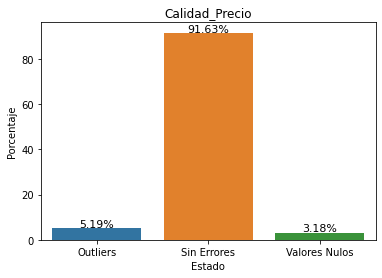

In [132]:
determinar_calidad(df_compras,'Precio')

#### Calidad de los datos de la columna 'Cantidad':

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_1512\1251029243.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0


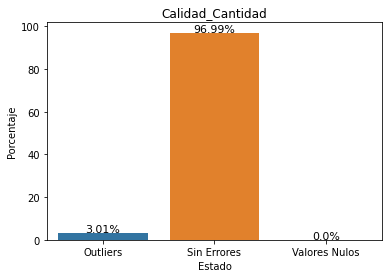

In [133]:
determinar_calidad(df_compras,'Cantidad')

## **Tabla:** Gasto
| | Columna Original | Columna Normalizada | Tipo de Dato Original | Descripción |
|:-------------------:|---|---|---|---|
| 0 | IdGasto | IdGasto | int64 | Clave única que identifica el gasto |
| 1 | IdSucursal | IdSucursal | int64 | Clave única que identifica la sucursal |
| 2 | IdTipoGasto | IdTipoGasto | int64 | Clave única que identifica el tipo de gasto |
| 3 | Fecha | Fecha | Object | Fecha registrada del gasto |
| 4 | Monto | Monto | float64 | Monto total del gasto |

In [134]:
df_gastos = pd.read_csv('Datasets/Gasto.csv')
df_gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


#### Integridad de los datos:

In [135]:
for columna in df_gastos.columns:
    print(porcentaje_de_valores_nulos(df_gastos,columna))

Porcentaje de valores nulos para la columna 'IdGasto': 0.0%
Porcentaje de valores nulos para la columna 'IdSucursal': 0.0%
Porcentaje de valores nulos para la columna 'IdTipoGasto': 0.0%
Porcentaje de valores nulos para la columna 'Fecha': 0.0%
Porcentaje de valores nulos para la columna 'Monto': 0.0%


#### Calidad de los datos de la columna 'Monto':

C:\Users\Daniel Casvill\AppData\Local\Temp\ipykernel_1512\1251029243.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outlier'][(df[columna] > maximo) | (df[columna] < minimo)] = 0


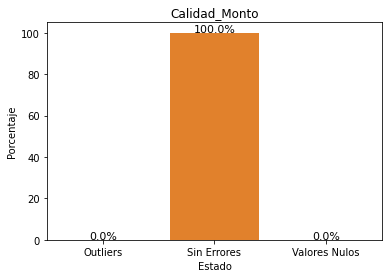

In [136]:
determinar_calidad(df_gastos,'Monto')